<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Cristina Vazquez, Gerardo Ruiz Velasco Lazalde.

**Fecha:** 20 de febrero del 2021.

**Expediente** : ,715878 .
**Profesor:** Oscar David Jaramillo Zuluaga.

**Link repositorio: https://github.com/GerardoRVL97/TAREA_9_RUIZ_G_VAZQUEZ_C **

# Tarea 9: Clase:22

# <font color = 'red'> Tarea: </font>

Replicar el procedimiento anterior para valoración de opciones 'call', pero en este caso para opciones tipo 'put' y compararlo con el valor teórico de la ecuación de Black-Scholes

In [2]:
#importar los paquetes que se van a usar
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import datetime
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
%matplotlib inline
#algunas opciones para Pandas
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 78)
pd.set_option('precision', 3)

In [3]:
aapl = web.YahooOptions('AAPL')
aapl_opt = aapl.get_all_data().reset_index()
aapl_opt.set_index('Expiry')
# aapl

,Strike,Type,Symbol,...,Quote_Time,Last_Trade_Date,JSON
Expiry,,,,,,,
2021-06-18,18.75,call,AAPL210618C00018750,...,2021-04-28 20:00:03,2021-04-26 18:30:03,"{'contractSymbol': 'AAPL210618C00018750', 'str..."
2021-06-18,18.75,put,AAPL210618P00018750,...,2021-04-28 20:00:03,2021-04-28 16:01:27,"{'contractSymbol': 'AAPL210618P00018750', 'str..."
2021-06-18,20.00,call,AAPL210618C00020000,...,2021-04-28 20:00:03,2021-04-14 15:36:52,"{'contractSymbol': 'AAPL210618C00020000', 'str..."
2021-06-18,20.00,put,AAPL210618P00020000,...,2021-04-28 20:00:03,2021-03-22 19:57:37,"{'contractSymbol': 'AAPL210618P00020000', 'str..."
2021-06-18,21.25,call,AAPL210618C00021250,...,2021-04-28 20:00:03,2021-02-04 18:50:12,"{'contractSymbol': 'AAPL210618C00021250', 'str..."
...,...,...,...,...,...,...,...
2021-09-17,1000.00,call,AAPL210917C01000000,...,2021-04-28 20:00:03,2020-08-28 19:58:31,"{'contractSymbol': 'AAPL210917C01000000', 'str..."
2022-01-21,1000.00,call,AAPL220121C01000000,...,2021-04-28 20:00:03,2020-08-28 19:59:43,"{'contractSymbol': 'AAPL220121C01000000', 'str..."
2022-06-17,1000.00,call,AAPL220617C01000000,...,2021-04-28 20:00:03,2020-08-28 19:48:09,"{'contractSymbol': 'AAPL220617C01000000', 'str..."


In [4]:
aapl_opt.Underlying_Price[0]

133.58

In [5]:
aapl_opt.loc[0, 'JSON']

{'contractSymbol': 'AAPL210618C00018750',
 'strike': 18.75,
 'currency': 'USD',
 'lastPrice': 115.8,
 'change': 0.0,
 'percentChange': 0.0,
 'volume': 1,
 'openInterest': 27,
 'bid': 112.5,
 'ask': 117.35,
 'contractSize': 'REGULAR',
 'expiration': 1623974400,
 'lastTradeDate': 1619461803,
 'impliedVolatility': 2.1406296484375,
 'inTheMoney': True}

In [6]:
fecha1 = '2021-06-18'
fecha2 = '2022-09-16'
put06_f1 = aapl_opt.loc[(aapl_opt.Expiry== fecha1) & (aapl_opt.Type=='put')]
put06_f2 = aapl_opt.loc[(aapl_opt.Expiry== fecha2) & (aapl_opt.Type=='put')]
put06_f1

,Strike,Expiry,Type,...,Quote_Time,Last_Trade_Date,JSON
1,18.75,2021-06-18,put,...,2021-04-28 20:00:03,2021-04-28 16:01:27,"{'contractSymbol': 'AAPL210618P00018750', 'str..."
3,20.00,2021-06-18,put,...,2021-04-28 20:00:03,2021-03-22 19:57:37,"{'contractSymbol': 'AAPL210618P00020000', 'str..."
5,21.25,2021-06-18,put,...,2021-04-28 20:00:03,2021-04-22 18:11:42,"{'contractSymbol': 'AAPL210618P00021250', 'str..."
7,22.50,2021-06-18,put,...,2021-04-28 20:00:03,2021-03-02 20:14:35,"{'contractSymbol': 'AAPL210618P00022500', 'str..."
10,23.75,2021-06-18,put,...,2021-04-28 20:00:03,2021-03-02 18:56:38,"{'contractSymbol': 'AAPL210618P00023750', 'str..."
...,...,...,...,...,...,...,...
2245,640.00,2021-06-18,put,...,2021-04-28 20:00:03,2020-08-25 16:08:58,"{'contractSymbol': 'AAPL210618P00640000', 'str..."
2255,660.00,2021-06-18,put,...,2021-04-28 20:00:03,2020-08-27 16:29:02,"{'contractSymbol': 'AAPL210618P00660000', 'str..."
2263,680.00,2021-06-18,put,...,2021-04-28 20:00:03,2020-08-25 14:59:07,"{'contractSymbol': 'AAPL210618P00680000', 'str..."
2271,700.00,2021-06-18,put,...,2021-04-28 20:00:03,2020-08-27 19:58:45,"{'contractSymbol': 'AAPL210618P00700000', 'str..."


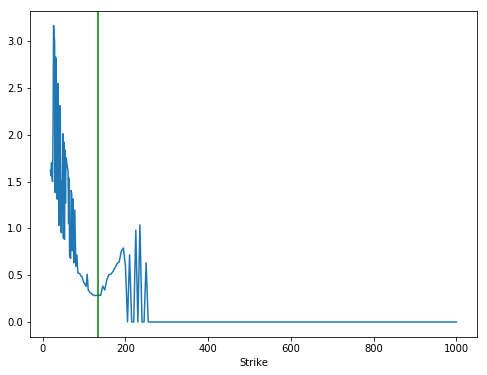

In [7]:
# para los put de la fecha 1
ax = put06_f1.set_index('Strike').loc[:, 'IV'].plot(figsize=(8,6))
ax.axvline(put06_f1.Underlying_Price.iloc[0], color='g');

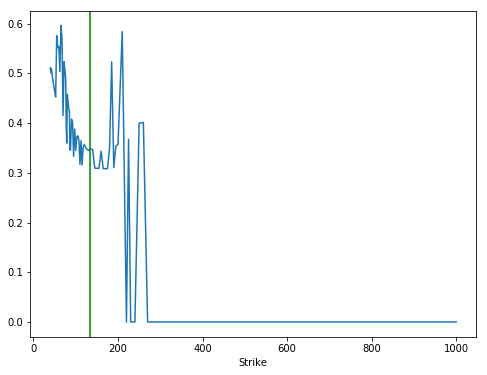

In [8]:
# para los put de la fecha 2
ax = put06_f2.set_index('Strike').loc[:, 'IV'].plot(figsize=(8,6))
ax.axvline(put06_f2.Underlying_Price.iloc[0], color='g');

In [9]:
# Función para descargar precios de cierre ajustados:
def get_adj_closes(tickers, start_date=None, end_date=None):
    # Fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # Descargamos DataFrame con todos los datos
    closes = web.DataReader(name=tickers, data_source='yahoo', start=start_date, end=end_date)
    # Solo necesitamos los precios ajustados en el cierre
    closes = closes['Adj Close']
    # Se ordenan los índices de manera ascendente
    closes.sort_index(inplace=True)
    return closes

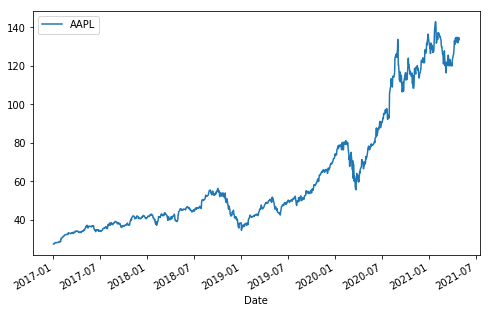

In [10]:
ticker = ['AAPL']
start_date = '2017-01-01'

closes_aapl = get_adj_closes(ticker, start_date)
closes_aapl.plot(figsize=(8,5));
plt.legend(ticker);

In [11]:
def calc_daily_ret(closes):
    return np.log(closes/closes.shift(1)).iloc[1:]

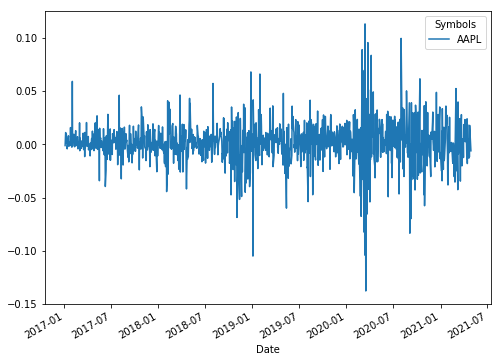

In [12]:
ret_aapl = calc_daily_ret(closes_aapl)
ret_aapl.plot(figsize=(8,6));

In [13]:
aapl = web.YahooOptions('AAPL')
aapl_opt = aapl.get_all_data().reset_index()
aapl_opt.set_index('Expiry').sort_index()

,Strike,Type,Symbol,...,Quote_Time,Last_Trade_Date,JSON
Expiry,,,,,,,
2021-04-30,75.0,put,AAPL210430P00075000,...,2021-04-28 20:00:03,2021-04-27 13:30:01,"{'contractSymbol': 'AAPL210430P00075000', 'str..."
2021-04-30,132.0,put,AAPL210430P00132000,...,2021-04-28 20:00:03,2021-04-28 19:59:57,"{'contractSymbol': 'AAPL210430P00132000', 'str..."
2021-04-30,80.0,put,AAPL210430P00080000,...,2021-04-28 20:00:03,2021-04-26 16:38:05,"{'contractSymbol': 'AAPL210430P00080000', 'str..."
2021-04-30,80.0,call,AAPL210430C00080000,...,2021-04-28 20:00:03,2021-04-26 18:35:15,"{'contractSymbol': 'AAPL210430C00080000', 'str..."
2021-04-30,133.0,call,AAPL210430C00133000,...,2021-04-28 20:00:03,2021-04-28 19:59:52,"{'contractSymbol': 'AAPL210430C00133000', 'str..."
...,...,...,...,...,...,...,...
2023-06-16,120.0,call,AAPL230616C00120000,...,2021-04-28 20:00:03,2021-04-28 19:54:53,"{'contractSymbol': 'AAPL230616C00120000', 'str..."
2023-06-16,120.0,put,AAPL230616P00120000,...,2021-04-28 20:00:03,2021-04-28 18:55:47,"{'contractSymbol': 'AAPL230616P00120000', 'str..."
2023-06-16,125.0,call,AAPL230616C00125000,...,2021-04-28 20:00:03,2021-04-28 19:51:25,"{'contractSymbol': 'AAPL230616C00125000', 'str..."


In [14]:
aapl_opt.Underlying_Price[0]


133.58

In [15]:
K = 135 # strike price
indice_opt = aapl_opt.loc[(aapl_opt.Type=='put') & (aapl_opt.Strike==K) & (aapl_opt.Expiry=='2023-06-16')]
indice_opt

,Strike,Expiry,Type,...,Quote_Time,Last_Trade_Date,JSON
1231,135.0,2023-06-16,put,...,2021-04-28 20:00:03,2021-04-28 19:55:48,"{'contractSymbol': 'AAPL230616P00135000', 'str..."


In [16]:
i_opt= indice_opt.index
opcion_valuar = aapl_opt.loc[i_opt[0]]
opcion_valuar['JSON']

{'contractSymbol': 'AAPL230616P00135000',
 'strike': 135.0,
 'currency': 'USD',
 'lastPrice': 24.65,
 'change': 0.39999962,
 'percentChange': 1.649483,
 'volume': 73,
 'openInterest': 248,
 'bid': 22.0,
 'ask': 27.0,
 'contractSize': 'REGULAR',
 'expiration': 1686873600,
 'lastTradeDate': 1619639748,
 'impliedVolatility': 0.3392705233764648,
 'inTheMoney': True}

In [17]:
print('Precio del activo subyacente actual = ',opcion_valuar.Underlying_Price)

Precio del activo subyacente actual =  133.58


In [18]:
# Obtenemos el rendimiento simple
Ri = closes_aapl.pct_change(1).iloc[1:]
# Obtenemos su media y desviación estándar de los rendimientos
mu_R = Ri.mean()[0]
sigma_R = Ri.std()[0]
Ri

Symbols,AAPL
Date,
2017-01-04,-0.001
2017-01-05,0.005
2017-01-06,0.011
2017-01-09,0.009
2017-01-10,0.001
...,...
2021-04-22,-0.012
2021-04-23,0.018
2021-04-26,0.003


In [19]:
from datetime import date

# Encontrar la fecha de hoy en fomato timestamp
today = pd.to_datetime(date.today())

# Obtener fecha de cierre de la opción a valuar
expiry = opcion_valuar.Expiry

nscen = 1000

# Generar rangos de fechas de días hábiles
dates = pd.date_range(today, expiry, freq='B')
ndays = len(dates)

In [20]:
today = pd.to_datetime(date.today())

# Obtener fecha de cierre de la opción a valuar
expiry = opcion_valuar.Expiry

len(pd.date_range(today, expiry, freq='B'))

558

In [21]:
dt = 1; # Rendimiento diario 
Z = np.random.randn(ndays,nscen)  # Z ~ N(0,1)
# Simulación normal de los rendimientos
Ri_dt = pd.DataFrame(mu_R*dt+Z*sigma_R*np.sqrt(dt),index=dates)
Ri_dt.cumprod()

,0,1,2,...,997,998,999
2021-04-28,-3.511e-02,2.562e-02,-7.937e-03,...,-1.926e-02,6.098e-03,3.550e-02
2021-04-29,-8.140e-04,9.115e-04,1.031e-04,...,6.524e-04,-1.182e-05,1.869e-03
2021-04-30,-1.555e-05,2.479e-05,-1.290e-06,...,-1.067e-05,8.642e-11,-5.573e-05
2021-05-03,1.010e-06,7.146e-07,2.339e-08,...,2.660e-08,-1.615e-12,-1.629e-06
2021-05-04,-1.686e-08,-6.180e-09,1.045e-09,...,1.543e-10,8.557e-15,-2.755e-08
...,...,...,...,...,...,...,...
2023-06-12,0.000e+00,-0.000e+00,0.000e+00,...,0.000e+00,-0.000e+00,-0.000e+00
2023-06-13,-0.000e+00,0.000e+00,-0.000e+00,...,-0.000e+00,-0.000e+00,-0.000e+00
2023-06-14,0.000e+00,-0.000e+00,-0.000e+00,...,0.000e+00,0.000e+00,-0.000e+00
2023-06-15,0.000e+00,-0.000e+00,-0.000e+00,...,-0.000e+00,-0.000e+00,-0.000e+00


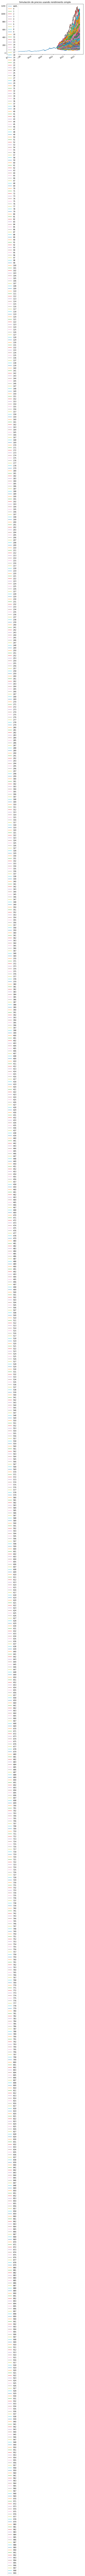

In [22]:
# Simulación del precio
S_0 = closes_aapl.iloc[-1,0]
S_T = S_0*(1+Ri_dt).cumprod()

# Se muestran los precios simulados con los precios descargados
pd.concat([closes_aapl,S_T]).plot(figsize=(8,6));
plt.title('Simulación de precios usando rendimiento simple');

In [23]:
ri = calc_daily_ret(closes_aapl)
# Usando la media y desviación estándar de los rendimientos logarítmicos
mu_r = ri.mean()[0]
sigma_r = ri.std()[0]

# # Usando la equivalencia teórica
# mu_r2 = mu_R - (sigma_R**2)/2

sim_ret_ri = pd.DataFrame(mu_r*dt+Z*sigma_r*np.sqrt(dt), index=dates)

# Simulación del precio
S_0 = closes_aapl.iloc[-1,0]
S_T2 = S_0*np.exp(sim_ret_ri.cumsum())

# Se muestran los precios simulados con los precios descargados
# pd.concat([closes_aapl,S_T2]).plot(figsize=(8,6));
# plt.title('Simulación de precios usando rendimiento logarítmico');

# from sklearn.metrics import mean_absolute_error
e1 = np.abs(S_T-S_T2).mean().mean()
e1

0.8513382347215643

In [24]:
print('Las std usando rendimientos logarítmicos y simples son similares')
sigma_R,sigma_r

Las std usando rendimientos logarítmicos y simples son similares


(0.01990415540264095, 0.019922754361072752)

In [25]:
opcion_valuar['JSON']

{'contractSymbol': 'AAPL230616P00135000',
 'strike': 135.0,
 'currency': 'USD',
 'lastPrice': 24.65,
 'change': 0.39999962,
 'percentChange': 1.649483,
 'volume': 73,
 'openInterest': 248,
 'bid': 22.0,
 'ask': 27.0,
 'contractSize': 'REGULAR',
 'expiration': 1686873600,
 'lastTradeDate': 1619639748,
 'impliedVolatility': 0.3392705233764648,
 'inTheMoney': True}

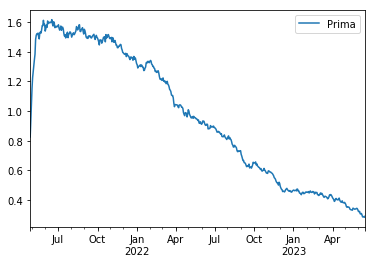

In [26]:
strike = pd.DataFrame(opcion_valuar['JSON']['strike']*np.ones([ndays,nscen]), index=dates)
put = pd.DataFrame({'Prima':np.exp(-mu_r*ndays) \
              *np.fmax(strike-S_T2,np.zeros([ndays,nscen])).mean(axis=1)}, index=dates)
put.plot();

In [27]:
mu = ret_aapl.mean()[0]
sigma = ret_aapl.std()[0]
mu, sigma

(0.0014566965181412423, 0.019922754361072752)

In [28]:
# Tasa de bonos de 1 yr de fecha 21/04/2021 -> 7%
r = 0.007/360 # Tasa diaria

In [33]:
from datetime import date

today = pd.Timestamp(date.today())
expiry = opcion_valuar.Expiry

dates = pd.date_range(start=today, end=expiry, freq='B')

ndays = len(dates)
nscen = 1000
dates

DatetimeIndex(['2021-04-28', '2021-04-29', '2021-04-30', '2021-05-03',
               '2021-05-04', '2021-05-05', '2021-05-06', '2021-05-07',
               '2021-05-10', '2021-05-11',
               ...
               '2023-06-05', '2023-06-06', '2023-06-07', '2023-06-08',
               '2023-06-09', '2023-06-12', '2023-06-13', '2023-06-14',
               '2023-06-15', '2023-06-16'],
              dtype='datetime64[ns]', length=558, freq='B')

In [34]:
sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r, index=dates)
sim_ret.cumsum()
# Las columnas son los escenarios y las filas son las días de contrato

,0,1,2,...,997,998,999
2021-04-28,-0.001,9.222e-04,-0.021,...,-0.026,-0.004,0.014
2021-04-29,0.021,2.655e-02,-0.002,...,0.023,0.045,0.052
2021-04-30,0.005,8.127e-03,0.041,...,0.076,0.028,0.048
2021-05-03,0.016,3.052e-02,0.058,...,0.062,0.009,0.105
2021-05-04,0.046,3.446e-02,0.081,...,0.067,0.015,0.087
...,...,...,...,...,...,...,...
2023-06-12,0.718,-9.307e-01,0.254,...,0.230,-0.316,0.713
2023-06-13,0.706,-9.290e-01,0.245,...,0.225,-0.300,0.720
2023-06-14,0.693,-9.201e-01,0.198,...,0.218,-0.332,0.737
2023-06-15,0.679,-9.176e-01,0.202,...,0.212,-0.318,0.731


In [35]:
S0 = closes_aapl.iloc[-1,0]  # Condición inicial del precio a simular
sim_closes = S0*np.exp(sim_ret.cumsum())
sim_closes

,0,1,2,...,997,998,999
2021-04-28,133.445,133.703,130.808,...,130.178,133.063,135.443
2021-04-29,136.399,137.174,133.260,...,136.668,139.750,140.756
2021-04-30,134.303,134.670,139.175,...,144.162,137.305,140.163
2021-05-03,135.667,137.720,141.610,...,142.107,134.771,148.313
2021-05-04,139.800,138.263,144.848,...,142.855,135.645,145.760
...,...,...,...,...,...,...,...
2023-06-12,273.801,52.667,172.183,...,168.047,97.363,272.417
2023-06-13,270.727,52.758,170.581,...,167.319,98.989,274.350
2023-06-14,267.173,53.228,162.878,...,166.168,95.881,279.020
2023-06-15,263.395,53.363,163.462,...,165.184,97.236,277.501


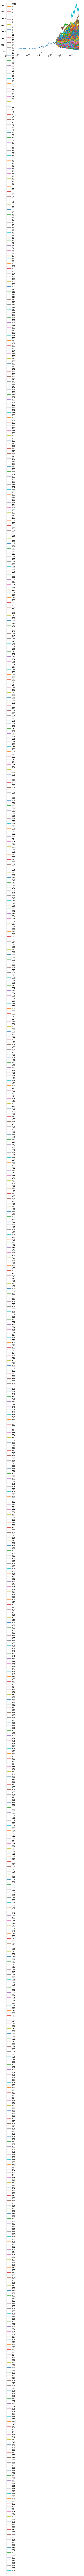

In [36]:
# Se muestran los precios simulados con los precios descargados
pd.concat([closes_aapl,sim_closes]).plot(figsize=(8,6));


In [38]:
opcion_valuar['JSON']

{'contractSymbol': 'AAPL230616P00135000',
 'strike': 135.0,
 'currency': 'USD',
 'lastPrice': 24.65,
 'change': 0.39999962,
 'percentChange': 1.649483,
 'volume': 73,
 'openInterest': 248,
 'bid': 22.0,
 'ask': 27.0,
 'contractSize': 'REGULAR',
 'expiration': 1686873600,
 'lastTradeDate': 1619639748,
 'impliedVolatility': 0.3392705233764648,
 'inTheMoney': True}

In [39]:
sigma = 0.3392705233764648/np.sqrt(252)
sigma

0.021372034095925037

In [40]:
from datetime import date
Hoy = date.today()
K = opcion_valuar['JSON']['strike']  # strike price
ndays = (opcion_valuar.Expiry - today).days
nscen = 100000
dates = pd.date_range(start= Hoy, periods = ndays)
S0 = closes_aapl.iloc[-1,0]  # Condición inicial del precio a simular

sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r,index=dates)
sim_closes = S0*np.exp(sim_ret.cumsum())
#strike = pd.DataFrame({'Strike':K*np.ones(ndays)}, index=dates)
#simul = pd.concat([closes_aapl.T,strike.T,sim_closes.T]).T
#simul.plot(figsize=(8,6),legend=False);

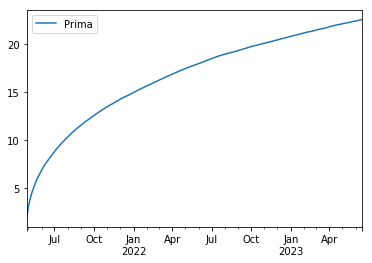

In [41]:
strike = pd.DataFrame(K*np.ones([ndays,nscen]), index=dates)
put = pd.DataFrame({'Prima':np.exp(-r*ndays) \
              *np.fmax(strike-sim_closes,np.zeros([ndays,nscen])).mean(axis=1)}, index=dates)
put.plot();

In [42]:
put.iloc[-1]

Prima    22.585
Name: 2023-06-15 00:00:00, dtype: float64

In [44]:
confianza = 0.99
sigma_est = sim_closes.iloc[-1].sem()
mean_est = put.iloc[-1].Prima
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i2)


(21.723343822860183, 23.44751372912705)


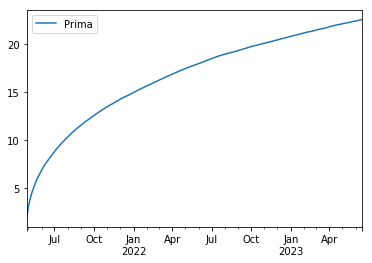

In [45]:
# Usando muestreo estratificado----> #estratros = nscen
U = (np.arange(0,nscen)+np.random.rand(ndays,nscen))/nscen
Z = st.norm.ppf(U)

sim_ret2 = pd.DataFrame(sigma*Z+r,index=dates)
sim_closes2 = S0*np.exp(sim_ret.cumsum())

# Función de pago
strike = pd.DataFrame(K*np.ones([ndays,nscen]), index=dates)
put = pd.DataFrame({'Prima':np.exp(-r*ndays) \
              *np.fmax(strike-sim_closes2,np.zeros([ndays,nscen])).T.mean()}, index=dates)
put.plot();

In [46]:
put.iloc[-1]

Prima    22.585
Name: 2023-06-15 00:00:00, dtype: float64

In [47]:
confianza = 0.99
sigma_est = sim_closes2.iloc[-1].sem()
mean_est = put.iloc[-1].Prima
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i2)

(21.723343822860183, 23.44751372912705)


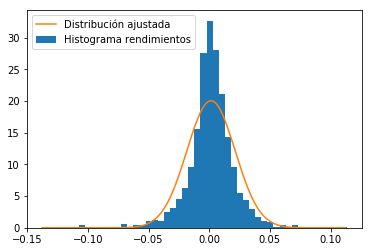

In [48]:
#Ajustando Norm
ren = calc_daily_ret(closes_aapl) # rendimientos 
y,x,des = plt.hist(ren['AAPL'],bins=50,density=True,label='Histograma rendimientos')

mu_fit,sd_fit = st.norm.fit(ren) # Se ajustan los parámetros de una normal
# Valores máximo y mínimo de los rendiemientos a generar
ren_max = max(x);ren_min = min(x)
# Vector de rendimientos generados
ren_gen = np.arange(ren_min,ren_max,0.001)
# Generación de la normal ajustado con los parámetros encontrados
curve_fit = st.norm.pdf(ren_gen,loc=mu_fit,scale=sd_fit)
plt.plot(ren_gen,curve_fit,label='Distribución ajustada')
plt.legend()
plt.show()


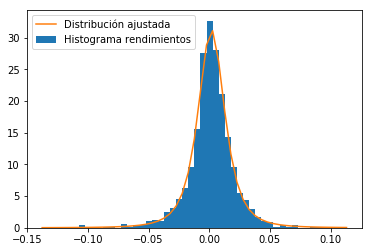

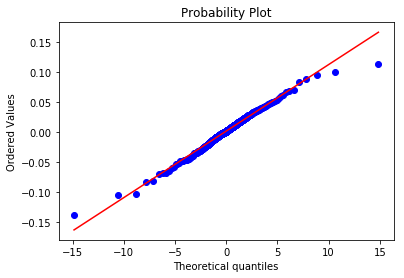

In [50]:
# rendimientos 
ren = calc_daily_ret(closes_aapl) 

# Histograma de los rendimientos
y, x, _ = plt.hist(ren['AAPL'], bins=50, density=True, label='Histograma rendimientos')

# Se ajustan los parámetros de una distribución
dist = 't'
params = getattr(st, dist).fit(ren.values) 

# Generación de la pdf de la distribución ajustado con los parámetros encontrados
curve_fit = getattr(st, dist).pdf(x, *params)
plt.plot(x, curve_fit, label='Distribución ajustada')
plt.legend()
plt.show()

# Q-Q
st.probplot(ren['AAPL'], sparams=params[:-2], dist=dist, plot=plt);



In [52]:
ndays = len(dates) 
nscen = 10
prob = y/np.sum(y)
values = x[1:]
prob.sum()

1.0

In [54]:
# Rendimientos simulados
ret = np.random.choice(values, ndays*nscen, p=prob)
# Fechas
dates = pd.date_range(start=Hoy,periods=ndays)
# Rendimien en Data Frame
sim_ret_hist = pd.DataFrame(ret.reshape((ndays,nscen)),index=dates)
sim_ret_hist

,0,1,2,...,7,8,9
2021-04-28,-0.067,-0.007,-0.032,...,0.003,-0.002,0.018
2021-04-29,0.033,0.003,0.038,...,0.018,0.003,0.008
2021-04-30,0.003,0.003,0.003,...,-0.002,-0.032,0.003
2021-05-01,-0.012,0.008,-0.012,...,0.008,-0.047,0.003
2021-05-02,0.033,0.018,0.013,...,-0.037,0.003,-0.002
...,...,...,...,...,...,...,...
2023-06-11,-0.012,-0.002,0.018,...,-0.042,-0.002,0.008
2023-06-12,-0.012,0.003,0.043,...,0.018,-0.007,0.023
2023-06-13,-0.007,0.003,0.003,...,-0.022,0.013,-0.002
2023-06-14,0.008,0.008,-0.007,...,0.023,-0.017,0.008


In [55]:
sim_closes_hist = (closes_aapl.iloc[-1,0])*np.exp(sim_ret_hist.cumsum())
sim_closes_hist

,0,1,2,...,7,8,9
2021-04-28,124.865,132.614,129.329,...,133.951,133.281,135.983
2021-04-29,129.039,132.983,134.324,...,136.361,133.652,137.047
2021-04-30,129.398,133.352,134.697,...,136.056,129.398,137.428
2021-05-01,127.819,134.396,133.054,...,137.120,123.408,137.810
2021-05-02,132.092,136.813,134.770,...,132.092,123.751,137.502
...,...,...,...,...,...,...,...
2023-06-11,5175.846,2764.442,1795.619,...,3245.900,1232.508,2261.767
2023-06-12,5112.699,2772.128,1874.356,...,3304.289,1223.595,2314.033
2023-06-13,5075.725,2779.836,1879.567,...,3231.387,1239.372,2308.854
2023-06-14,5115.440,2801.586,1865.975,...,3306.060,1218.124,2326.920


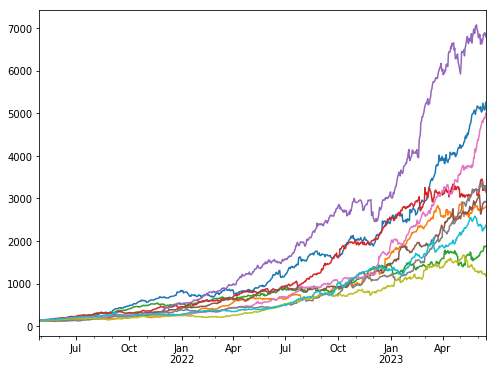

In [56]:
sim_closes_hist.plot(figsize=(8,6),legend=False);

Text(0.5, 1.0, 'Simulación usando el histograma de los rendimientos')

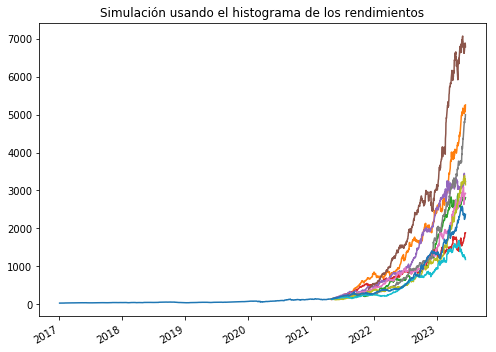

In [57]:
pd.concat([closes_aapl,sim_closes_hist]).plot(figsize=(8,6),legend=False);
plt.title('Simulación usando el histograma de los rendimientos')

In [58]:
K = opcion_valuar['JSON']['strike']
ndays = len(dates)
nscen = 100000

# Histograma tomando la tasa libre de riesgo
freq, values = np.histogram(ret_aapl+r-mu, bins=2000)
prob = freq/np.sum(freq)

# Simulación de los rendimientos
ret = np.random.choice(values[1:], ndays*nscen, p=prob)

# Simulación de precios
sim_ret_hist = pd.DataFrame(ret.reshape((ndays,nscen)),index=dates)
sim_closes_hist = (closes_aapl.iloc[-1,0]) * np.exp(sim_ret_hist.cumsum())

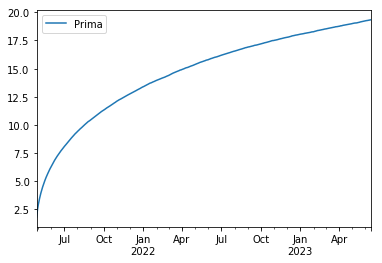

In [59]:
strike = pd.DataFrame(K*np.ones(ndays*nscen).reshape((ndays,nscen)), index=dates)
put_hist = pd.DataFrame({'Prima':np.exp(-r*ndays)*np.fmax(strike-sim_closes_hist,np.zeros(ndays*nscen).reshape((ndays,nscen))).T.mean()}, index=dates)
put_hist.plot();

In [60]:
put_hist.iloc[-1]

Prima    19.354
Name: 2023-06-15 00:00:00, dtype: float64

In [61]:
opcion_valuar['JSON']

{'contractSymbol': 'AAPL230616P00135000',
 'strike': 135.0,
 'currency': 'USD',
 'lastPrice': 24.65,
 'change': 0.39999962,
 'percentChange': 1.649483,
 'volume': 73,
 'openInterest': 248,
 'bid': 22.0,
 'ask': 27.0,
 'contractSize': 'REGULAR',
 'expiration': 1686873600,
 'lastTradeDate': 1619639748,
 'impliedVolatility': 0.3392705233764648,
 'inTheMoney': True}

In [63]:
confianza = 0.95
sigma_est = sim_closes_hist.iloc[-1].sem()
mean_est = put_hist.iloc[-1].Prima
i1 = st.t.interval(confianza,nscen-1, loc=mean_est, scale=sigma_est)
print(i1)


(18.735194292986435, 19.97277073620485)
